# Lesson 7 Anime Recommendation
Aluno: Samuel Nogueira Bacelar


Matrícula: 180130722


Github: [SamuelNoB](https://github.com/SamuelNoB)

# Introdução
Nessa lição aprendemos a criar um modelo de recomendação. Onde, com base em interações do usuário com um produto, filme, video etc, pode-se relizar recomendações de items semelhantes no qual aquele usuário ainda não interagiu. 

Aqui iremos criar um modelo de recomendação de animes utilizando o database [anime recommendation database.](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020). Iremos utilizar principalmente os datasets `anime.csv` e o `rating_complete.csv`, que contem uma lista de animes e das avaliações dos usuários que viram um determinado anime por completo, respectivamente.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.collab import *
from fastai.tabular.all import *
import matplotlib.pyplot as plt
import seaborn as sns
set_seed(42)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-recommendation-database-2020/watching_status.csv
/kaggle/input/anime-recommendation-database-2020/rating_complete.csv
/kaggle/input/anime-recommendation-database-2020/animelist.csv
/kaggle/input/anime-recommendation-database-2020/anime.csv
/kaggle/input/anime-recommendation-database-2020/anime_with_synopsis.csv
/kaggle/input/anime-recommendation-database-2020/html folder/instructions.txt
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/reviews_1.html
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/staff.html
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/reviews_2.html
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/pictures.html
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/stats.html
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/details.html
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/reviews_3.html
/kaggle/input/anime

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/anime-recommendation-database-2020/watching_status.csv
/kaggle/input/anime-recommendation-database-2020/rating_complete.csv
/kaggle/input/anime-recommendation-database-2020/animelist.csv
/kaggle/input/anime-recommendation-database-2020/anime.csv
/kaggle/input/anime-recommendation-database-2020/anime_with_synopsis.csv
/kaggle/input/anime-recommendation-database-2020/html folder/instructions.txt
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/reviews_1.html
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/staff.html
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/reviews_2.html
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/pictures.html
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/stats.html
/kaggle/input/anime-recommendation-database-2020/html folder/html/5/details.html
/kaggle/input/anime-recommendation-database-2020/ht

Primeiro, iremos então obter todas as avaliações dos usuários para os animes. Lembrando que as avaliações vão de **0 a 10**

In [3]:
ratings_df = pd.read_csv('/kaggle/input/anime-recommendation-database-2020/rating_complete.csv')
ratings_df

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


Como é possível ver, o dataset contem uma grande quantidade de avalações, 57.633.278 para ser exato. e contém um tamanho total de 817.9Mb.

Após isso iremos então obter a lista completa de animes. Podemos ver que há um total de 17.562 animes diferentes.

In [4]:
animes = pd.read_csv("/kaggle/input/anime-recommendation-database-2020/anime.csv")
animes

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, Magic",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supernatural, Thriller",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


Estamos mais interessados em obter seu `MAL_ID` e seu `Name`, por isso vamos usar apenas isso e converter o nome das colunas para `anime_id` e `name`, respectivamente

In [5]:
animes_id_and_name = animes[['MAL_ID', 'Name']]
animes_id_and_name = animes_id_and_name.rename(columns={'MAL_ID': 'anime_id', 'Name': 'name'})
animes_id_and_name

,anime_id,name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu
17558,48483,Mieruko-chan
17559,48488,Higurashi no Naku Koro ni Sotsu
17560,48491,Yama no Susume: Next Summit


Iremos mesclar os dataset de nomes de animes com as avaliações dos usuários, a fim de obter uma representação mais humanizada dos animes e também iremos verificar se há dados faltando. Caso houvesse seria necessário realizar alguma forma de tratamento. Mas nesse caso isso é desnecessário.

In [6]:
ratings_with_name_df = ratings_df.copy()
ratings_with_name_df = ratings_with_name_df.merge(animes_id_and_name)
ratings_with_name_df = ratings_with_name_df.sample(frac=1)
ratings_with_name_df

,user_id,anime_id,rating,name
41605545,70381,28825,10,Himouto! Umaru-chan
33600014,234934,1639,5,Boku no Pico
39884414,218449,95,8,Turn A Gundam
45251042,62798,31324,7,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizono Basketball Club no Nama Cream Party!
53777062,232609,39681,8,D4DJ: First Mix
...,...,...,...,...
13315092,310013,28907,7,"Gate: Jieitai Kanochi nite, Kaku Tatakaeri"
21081788,75847,9756,8,Mahou Shoujo Madoka★Magica
56882282,118606,29123,6,World Calling
49648910,80323,35714,5,Yami Shibai 5


In [7]:
ratings_with_name_df.isnull().sum()

user_id     0
anime_id    0
rating      0
name        0
dtype: int64

## Insights

Criando o Histograma das avaliações dadas pelos usuários, notamos que eles dificilmente tendem a dar notas ruins para as produções. Isso ocorre por conta do Efeito de Positividade onde as pessoas têm uma tendência natural a serem mais positivas ao avaliar algo. Isso pode ser influenciado pelo desejo de serem agradáveis, evitar conflitos ou simplesmente expressar uma perspectiva otimista.

<Axes: >

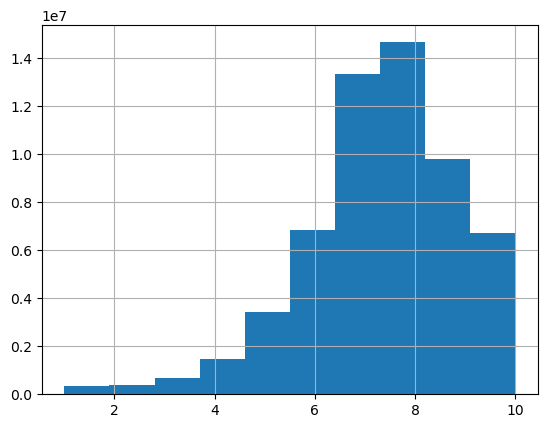

In [8]:
ratings_with_name_df['rating'].hist()

Vamos então agrupar os animes pelo seu nome de modo a obter as média e o total de avaliações cada um. Iremos usar esse dado para mostrar os animes mais populares de acordo com sua média.

In [9]:
grouped_ratings = ratings_with_name_df[['anime_id', 'rating', 'name']].groupby('name')['rating'].agg(['mean', 'count'])
grouped_ratings.columns = ['media', 'total']
grouped_ratings = grouped_ratings.reset_index()
grouped_ratings

,name,media,total
0,"""0""",4.670563,941
1,"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",4.277778,18
2,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",6.975100,4739
3,"""Bungaku Shoujo"" Memoire",7.417346,5154
4,"""Bungaku Shoujo"" Movie",7.519448,9718
...,...,...,...
16865,xxxHOLiC Rou,8.272705,8269
16866,xxxHOLiC Shunmuki,8.107105,10373
16867,Üks Uks,4.727273,11
16868,ēlDLIVE,6.163964,3330


In [10]:
top_10_anime = grouped_ratings.loc[grouped_ratings['total'] > 20].nlargest(10, columns=['media', 'total'])
top_10_anime

,name,media,total
4456,Gintama°,9.245648,20794
3891,Fullmetal Alchemist: Brotherhood,9.237010,134197
4378,Ginga Eiyuu Densetsu,9.224730,9438
13909,Steins;Gate,9.184228,122772
5821,Hunter x Hunter (2011),9.169439,79970
4441,Gintama',9.150585,27692
4453,Gintama: The Final,9.146341,164
4437,Gintama,9.110528,34326
2322,Clannad: After Story,9.053407,88658
4442,Gintama': Enchousen,9.043576,22352


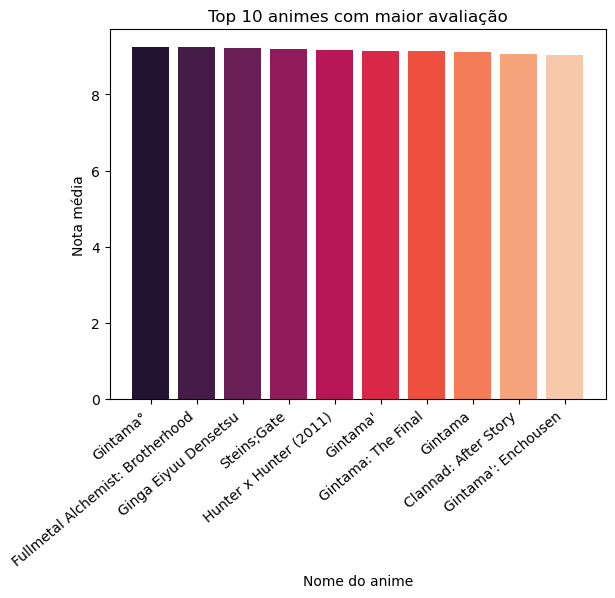

In [11]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each anime name
palette = sns.color_palette('rocket', len(top_10_anime))
# Create the bar chart
plt.bar(top_10_anime['name'], top_10_anime['media'], color=palette)

# Set the title and labels
plt.title('Top 10 animes com maior avaliação')
plt.xlabel('Nome do anime')
plt.ylabel('Nota média')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=40, ha="right")

# Show the plot
plt.show()

O gráfico acima mostra os 10 animes mais populares de acordo com a média de avaliações dadas pelos usuários. Podemos ver que o anime Gintama é um dos mais populares pois o mesmo aparece 4x no ranking! Embora cada uma dessas aparições seja uma temporada ou arco diferente. Esse comportamente onde dois ou mais títulos que retratam a mesma história são tratados como algo diferentes é algo normal nos animes, uma vez que é comum o estúdio responsável pelo anime ser trocado ou o anime retrata uma história completamente nova mas com os mesmos personagens.



# Criando dataloaders

In [12]:
ratings_with_name_df

,user_id,anime_id,rating,name
41605545,70381,28825,10,Himouto! Umaru-chan
33600014,234934,1639,5,Boku no Pico
39884414,218449,95,8,Turn A Gundam
45251042,62798,31324,7,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizono Basketball Club no Nama Cream Party!
53777062,232609,39681,8,D4DJ: First Mix
...,...,...,...,...
13315092,310013,28907,7,"Gate: Jieitai Kanochi nite, Kaku Tatakaeri"
21081788,75847,9756,8,Mahou Shoujo Madoka★Magica
56882282,118606,29123,6,World Calling
49648910,80323,35714,5,Yami Shibai 5


Abaixo criamos uma tabela de pivós, que relaciona todos os animes com as notas de que os usuários deram ou não àquele anime. Como é possível ver, há muitos zeros em diversas células, uma vez que há uma quantidade grande de animes para uma pessoa ver. Mas com essa visualização é possível inferir que muitos animes ainda nao foram vistos ou avaliados por muitas pessoas.

In [13]:
pivot_table = pd.pivot_table(ratings_with_name_df.iloc[:25], columns='user_id', values='rating', index='name', fill_value=0)
pivot_table

user_id,13162,37088,62798,70381,87773,97905,135965,151771,151938,156431,...,232609,234934,238152,259778,264080,271020,275984,302961,333472,350874
name,,,,,,,,,,,,,,,,,,,,,
00:08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,0,0,0
3-gatsu no Lion,0,0,0,0,0,0,0,0,0,0,...,0,0,9,0,0,0,0,0,0,0
Aho Girl,0,0,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
Aoi Hana,0,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
Black Lagoon: Roberta's Blood Trail,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boku no Pico,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
Choboraunyopomi Gekijou Ai Mai Mii,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D4DJ: First Mix,0,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,0,0
Death Note,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Iremos então criar o dataloader para nosso modelo. Como temos mais de 57 Milhões de avaliações, um treinamento com uma quantidade enorme assim de dados demoraria muito tempo. Por conta disso foi reduzido a quantidade para um valor arbitrário de 500 mil registros.

In [14]:
max_ratings = 500_000
limited_ratings = ratings_with_name_df.iloc[:max_ratings]

Entretanto, antes de criar o dataloader, iremos adicionar um **novo usuário** que representa o autor desse artigo, bem como suas notas pessoais para alguns animes. O **id do novo ususário será o de 12345678**

In [15]:
user_id = 12345678

rows = []
animes = ["Fullmetal Alchemist: Brotherhood", "Naruto", 'Kimetsu no Yaiba', 'Vinland Saga', 'Dr. Stone']
ratings = [10, 9, 10, 8, 7]
def add_user_ratings_to_df(df, user_id, animes, ratings):
    for a_anime, a_rating in zip(animes, ratings):
        # anime_id é sempre 1 pois a coluna não será levada em conta a frente.
        rows.append( dict( {'anime_id': 1, 'name' : a_anime, 'user_id' : user_id, 'rating' : a_rating}))
    user_data = pd.DataFrame(rows)
    return pd.concat([limited_ratings, user_data], axis=0)
    
ratings_with_user_data = add_user_ratings_to_df(limited_ratings, user_id, animes, ratings)
ratings_with_user_data.tail()

,user_id,anime_id,rating,name
0,12345678,1,10,Fullmetal Alchemist: Brotherhood
1,12345678,1,9,Naruto
2,12345678,1,10,Kimetsu no Yaiba
3,12345678,1,8,Vinland Saga
4,12345678,1,7,Dr. Stone


In [16]:
dls = CollabDataLoaders.from_df(ratings_with_user_data, item_name='name', user_name='user_id', bs=4096)
dls.show_batch()

,user_id,name,rating
0,30682,Gintama',10
1,58298,25-sai no Joshikousei,2
2,277125,Arakawa Under the Bridge x Bridge,9
3,318552,Elfen Lied,7
4,127844,Neon Genesis Evangelion: The End of Evangelion,10
5,11205,Re:Zero kara Hajimeru Isekai Seikatsu,9
6,65472,Kidou Senkan Nadesico,8
7,259056,Casshern: Robot Hunter,8
8,88305,Vampire Knight: Guilty,7
9,33365,Macross F,9


# Treinando os modelos

In [17]:
n_users  = len(dls.classes['user_id'])
n_animes = len(dls.classes['name'])
n_users, n_animes

(164066, 11429)

## DotProduct

Primeiro, remos criar uma classe que será usada para treinar o nosso modelo. Nossa classe realiza o Produto Escalar dos fatores dos usuários pelos fatores dos animes e então realiza uma soma e retorna esse resultado.

In [18]:
class DotProduct(Module):
    def __init__(self, n_users, n_animes, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.anime_factors = Embedding(n_animes, n_factors)
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        animes = self.anime_factors(x[:,1])
        return (users * animes).sum(dim=1)

In [19]:
model = DotProduct(n_users, n_animes, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())

Então realizamos o treinamento com um total de 5 épocas.

In [20]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,59.300640,59.350552,00:10
1,59.284267,59.349716,00:09
2,59.176556,59.340347,00:09
3,58.965981,59.326958,00:09
4,58.852753,59.324112,00:08


## DotProductBias

In [21]:
class DotProductBias(Module):
    def __init__(self, n_users, n_animes, n_factors, y_range=(0,10.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.anime_factors = Embedding(n_animes, n_factors)
        self.anime_bias = Embedding(n_animes, 1)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        animes = self.anime_factors(x[:,1])
        res = (users * animes).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.anime_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

### Treinando o DotProductBias
Treinando modelo que foi criado.

In [22]:
model = DotProductBias(n_users, n_animes, 100)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,7.209223,6.334082,00:19
1,4.399929,3.741830,00:18
2,1.501885,3.393388,00:18
3,0.505241,3.347927,00:18
4,0.249797,3.344004,00:18


Treinando o modelo com o wheight decay 0.2

In [23]:
model = DotProductBias(n_users, n_animes, 100)
learn_wd2 = Learner(dls, model, loss_func=MSELossFlat())
learn_wd2.fit_one_cycle(5, 5e-3, wd=.2)

epoch,train_loss,valid_loss,time
0,7.219218,6.412533,00:19
1,4.548936,3.962016,00:19
2,1.662265,3.600353,00:19
3,0.607402,3.576503,00:18
4,0.326649,3.574747,00:18


Treinando o modelo com 200 factors.

In [24]:
model = DotProductBias(n_users, n_animes, 200)
learn_200fac = Learner(dls, model, loss_func=MSELossFlat())
learn_200fac.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,7.209547,6.337857,00:36
1,4.078594,3.732295,00:34
2,1.187196,3.670393,00:34
3,0.352079,3.601231,00:34
4,0.139756,3.597460,00:33


Treinando o modelo com o wheight decay 0.2 e com 200 factors

In [25]:
model = DotProductBias(n_users, n_animes, 200)
learn_wd2_200fac = Learner(dls, model, loss_func=MSELossFlat())
learn_wd2_200fac.fit_one_cycle(5, 5e-3, wd=.2)

epoch,train_loss,valid_loss,time
0,7.216393,6.354500,00:36
1,4.223946,3.836278,00:33
2,1.286040,3.798557,00:33
3,0.406542,3.749292,00:33
4,0.175929,3.748470,00:33


Treinando o modelo com o wheight decay 0.3.


In [26]:
model = DotProductBias(n_users, n_animes, 100)
learn_wd3 = Learner(dls, model, loss_func=MSELossFlat())
learn_wd3.fit_one_cycle(5, 5e-3, wd=.3)

epoch,train_loss,valid_loss,time
0,7.229380,6.400697,00:18
1,4.610957,3.983191,00:17
2,1.747532,3.610752,00:17
3,0.670551,3.592783,00:17
4,0.376610,3.591601,00:18


Treinando o modelo com o wheight decay 0.5


In [27]:
model = DotProductBias(n_users, n_animes, 100)
learn_wd5 = Learner(dls, model, loss_func=MSELossFlat())
learn_wd5.fit_one_cycle(5, 5e-3, wd=.5)

epoch,train_loss,valid_loss,time
0,7.224516,6.427666,00:19
1,4.744823,4.122030,00:18
2,1.944416,3.720003,00:18
3,0.821565,3.711257,00:18
4,0.495248,3.709579,00:18


## Testando o modelo
Após vários treinamentos realizados acima, tentando diferentes variáveis podemos chegar a conclusão de que o modelo treinado com 200 fatores e sem weight decay foi com que obteve melhor desempenho com 5 épocas de execução. Portanto iremos salvar seu estado e usa-lo para rodar daqui em diante.

In [28]:
learn_200fac.save("trained_model")

Path('models/trained_model.pth')

Agora, usando o usuário 12345678 que criamos anteriormente, será criado um pequeno dataset com animes únicos que serão usados para realizar as predições

In [29]:
rows = []
anime_names = list(ratings_with_user_data.drop_duplicates(subset='name', keep='first').name)
for i in range(len(anime_names)):
    rows.append( dict({'user_id' : 12345678, 'name': anime_names[i]}))
test_data = pd.DataFrame(rows)
# Load your model


dl = learn_200fac.dls.test_dl(test_data)

Predições obtidas

In [30]:
preds, y = learn_200fac.get_preds(dl=dl)
preds, y

(tensor([[7.1627],
         [5.2606],
         [6.3225],
         ...,
         [5.1731],
         [5.6750],
         [5.7939]]),
 None)

Abaixo há o resultado para os 20 primeiros animes que 

In [31]:
# merge predictions with names
preds_df = pd.DataFrame({
    'item': anime_names,
    'prediction': preds.numpy().flatten()
}).sort_values('prediction', ascending=False)

# show top 10 ratings
display(preds_df[:20])

,item,prediction
5,Fullmetal Alchemist: Brotherhood,9.666072
320,Kimetsu no Yaiba,9.582901
126,Naruto,9.128947
39,Shingeki no Kyojin,8.733520
3253,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou,8.385988
536,One Punch Man,8.324605
48,Code Geass: Hangyaku no Lelouch R2,8.309860
928,Owarimonogatari 2nd Season,8.263084
1007,Great Teacher Onizuka,8.185009
412,Tate no Yuusha no Nariagari,8.174568


# Inferência de dados
Com o modelo testado e funcionando, iremos preencher a tabela de pivôs gerada anteriormente, com os dados gerados por nosso modelo.

In [32]:
pivot_table.index, pivot_table.columns

(Index(['00:08', '3-gatsu no Lion', 'Aho Girl', 'Aoi Hana',
        'Black Lagoon: Roberta's Blood Trail', 'Boku no Pico',
        'Choboraunyopomi Gekijou Ai Mai Mii', 'D4DJ: First Mix', 'Death Note',
        'Fate/stay night', 'Fullmetal Alchemist: Brotherhood',
        'Grisaia no Meikyuu: Caprice no Mayu 0 - Takizono Basketball Club no Nama Cream Party!',
        'Hanayamata', 'Harukana Receive: Yokoku', 'High School DxD New',
        'Higurashi no Naku Koro ni Kai', 'Himouto! Umaru-chan',
        'Kami nomi zo Shiru Sekai: Flag 0', 'Kiniro Mosaic',
        'Love Hina: Motoko no Sentaku, Koi ka Ken... "Naku na"',
        'Neon Genesis Evangelion',
        'Oretachi ni Tsubasa wa Nai: Hadairo Ritsu Kyuuwari Zou!?',
        'Princess Connect! Re:Dive', 'Turn A Gundam'],
       dtype='object', name='name'),
 Int64Index([ 13162,  37088,  62798,  70381,  87773,  97905, 135965, 151771,
             151938, 156431, 177649, 191407, 192122, 218172, 218449, 232609,
             234934, 23815

In [33]:
# Load your model
def get_user_predicts(user_id):
    test_data = {}
    rows = []
    for i in range(len(pivot_table.index)):
        rows.append( dict({'user_id' : user_id, 'name': pivot_table.index[i]}))    

    test_data = pd.DataFrame(rows)
    dl = learn_200fac.dls.test_dl(test_data)
    preds, y = learn_200fac.get_preds(dl=dl)
    return preds

users = pivot_table.columns
for idx, user in enumerate(users):
    user_predictions = get_user_predicts(user)
    print(f"{idx+1}: usuário - {user}")
    user_preds_flatten = user_predictions.numpy().flatten().round(2)
    pivot_table[user] = user_preds_flatten

1: usuário - 13162


2: usuário - 37088


3: usuário - 62798


4: usuário - 70381


5: usuário - 87773


6: usuário - 97905


7: usuário - 135965


8: usuário - 151771


9: usuário - 151938


10: usuário - 156431


11: usuário - 177649


12: usuário - 191407


13: usuário - 192122


14: usuário - 218172


15: usuário - 218449


16: usuário - 232609


17: usuário - 234934


18: usuário - 238152


19: usuário - 259778


20: usuário - 264080


21: usuário - 271020


22: usuário - 275984


23: usuário - 302961


24: usuário - 333472


25: usuário - 350874


In [34]:
pivot_table

user_id,13162,37088,62798,70381,87773,97905,135965,151771,151938,156431,...,232609,234934,238152,259778,264080,271020,275984,302961,333472,350874
name,,,,,,,,,,,,,,,,,,,,,
00:08,5.05,5.24,5.10,5.31,5.16,5.07,4.98,5.33,5.37,5.07,...,5.45,5.03,5.05,5.03,5.13,5.03,5.13,5.20,5.16,5.10
3-gatsu no Lion,6.58,6.92,6.54,7.42,6.83,6.53,6.20,7.10,6.50,6.50,...,7.13,6.21,9.12,6.42,6.96,7.22,7.25,6.67,6.48,6.88
Aho Girl,6.17,6.93,6.49,6.55,6.65,6.23,5.73,6.84,6.32,5.89,...,6.99,6.13,6.95,6.26,7.30,6.44,6.67,6.44,6.39,6.68
Aoi Hana,6.16,6.54,6.55,6.14,6.18,6.10,6.21,6.92,6.54,7.01,...,6.62,6.10,6.44,5.97,6.04,6.50,6.85,6.65,6.17,6.45
Black Lagoon: Roberta's Blood Trail,6.91,8.03,6.64,7.01,6.30,6.54,6.02,7.28,6.36,6.19,...,6.63,6.33,6.77,6.64,7.03,6.94,6.86,6.75,6.66,7.04
Boku no Pico,4.79,4.55,5.03,5.87,4.84,4.61,4.74,4.25,5.64,4.97,...,4.94,5.24,4.21,4.52,5.13,4.46,4.82,5.20,4.93,5.05
Choboraunyopomi Gekijou Ai Mai Mii,5.29,5.23,5.43,5.20,5.35,4.83,5.05,5.89,5.38,5.21,...,5.57,5.13,5.24,5.35,5.80,5.76,5.39,5.15,5.32,5.59
D4DJ: First Mix,5.97,6.00,6.01,6.10,5.92,5.78,5.66,5.75,6.02,5.84,...,6.16,5.73,5.96,5.78,5.94,6.07,6.14,5.77,5.87,6.08
Death Note,6.30,6.95,6.86,7.93,6.92,6.74,6.25,7.34,7.14,6.04,...,7.19,6.47,7.95,6.07,7.00,7.54,6.42,7.48,6.80,7.27
